In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time",'wind_gust_o'],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wind_gust_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M                     95.7%
12.346656              0.4%
11.317768000000001     0.4%
10.803324              0.4%
11.832212              0.3%
12.8611                0.3%
10.28888               0.3%
13.375544              0.3%
13.889988              0.2%
9.774436               0.2%
14.404432              0.2%
14.918876000000001     0.1%
9.259992               0.1%
15.43332               0.1%
8.745548               0.1%
15.947764000000001     0.1%
16.462208              0.1%
16.976652              0.1%
8.231104               0.1%
17.491096              0.1%
7.71666                0.1%
18.00554               0.0%
7.202216               0.0%
6.687772               0.0%
18.519984              0.0%
19.034428000000002     0.0%
20.063316              0.0%
20.57776               0.0%
19.548872              0.0%
21.092204              0.0%
22.635536000000002     0.0%
22.121092              0.0%
21.606648              0.0%
23.14998               0.0%
6.173328               0.0%
24.693312           

In [7]:
#label gust/no gust

station["wind_gust_l"] = "Gust"
mask = station['wind_gust_o'].str.contains("M")
station.loc[mask,["wind_gust_l"]] = "No Gust"

print(station.sample(100))
print("*****************************")
station["wind_gust_l"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

                            wind_gust_o wind_gust_l
time                                               
2018-10-15 12:30:00                   M     No Gust
2019-11-17 11:00:00                   M     No Gust
2020-10-19 08:00:00                   M     No Gust
2019-11-01 20:45:00  11.317768000000001        Gust
2019-04-16 15:00:00                   M     No Gust
2019-07-18 14:00:00                   M     No Gust
2018-10-13 10:30:00                   M     No Gust
2020-10-21 12:00:00                   M     No Gust
2019-07-22 11:30:00                   M     No Gust
2019-06-02 05:00:00                   M     No Gust
2020-12-12 21:00:00                   M     No Gust
2019-12-11 19:30:00                   M     No Gust
2019-07-01 11:00:00                   M     No Gust
2019-12-19 17:16:00                   M     No Gust
2020-08-31 17:30:00                   M     No Gust
2020-08-04 13:30:00                   M     No Gust
2020-09-21 08:30:00                   M     No Gust
2019-04-12 1

No Gust    95.7%
Gust        4.3%
Name: wind_gust_l, dtype: object

**Forecast D0**

In [8]:
#forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [24]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wind_gust_o","Unnamed: 0"]).dropna()
df_all1k.sample(25)

,wind_gust_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2020-07-19 06:00:00,No Gust,303.72,0.00,3344.71,0.40,0.81,101368.77,287.46,0.85,24231.76,...,0.00,-0.00,0.00,0.00,0.00,0.00,5774.72,1513.42,263.33,292.31
2019-08-27 16:00:00,No Gust,281.22,0.00,3042.96,5.06,6.30,101699.12,295.14,0.72,24110.67,...,0.00,-0.00,0.00,0.00,0.00,0.00,5760.03,1526.85,263.94,288.06
2020-05-29 04:00:00,No Gust,155.47,0.00,3215.09,0.87,1.71,101623.09,289.28,0.88,24135.00,...,0.00,-0.00,0.00,0.00,0.40,0.40,5739.95,1539.50,260.44,290.96
2019-05-22 21:00:00,No Gust,290.49,0.00,2131.60,2.65,3.74,102073.32,285.58,0.85,24053.54,...,0.00,-0.00,0.25,0.00,0.00,0.25,5685.95,1522.76,259.95,283.49
2019-05-05 07:00:00,No Gust,139.88,0.00,2011.18,2.25,3.31,101682.62,284.32,0.73,24135.00,...,0.00,0.00,0.06,0.00,0.00,0.06,5640.69,1494.30,256.95,283.56
2019-09-03 06:00:00,No Gust,163.73,0.00,3385.23,2.21,4.39,101919.38,287.28,0.83,24135.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5826.31,1555.59,266.11,290.98
2020-10-27 17:00:00,No Gust,190.57,0.00,2345.28,7.68,12.93,101521.07,287.77,0.95,24230.93,...,0.00,0.00,0.00,1.00,0.92,1.00,5637.82,1489.55,259.39,283.04
2019-12-15 06:00:00,No Gust,301.41,0.00,1564.60,6.14,9.71,100974.30,283.49,0.97,3839.32,...,6.24,-0.00,0.20,0.42,0.30,0.42,5480.58,1424.05,253.65,277.47
2020-07-31 22:00:00,No Gust,300.75,0.00,2998.29,2.60,3.78,102097.13,290.08,0.96,24232.81,...,0.00,0.00,0.00,0.24,0.00,0.24,5796.59,1548.48,264.44,287.91


**Scatter plot significant meteorological variables and wind_gust_l**

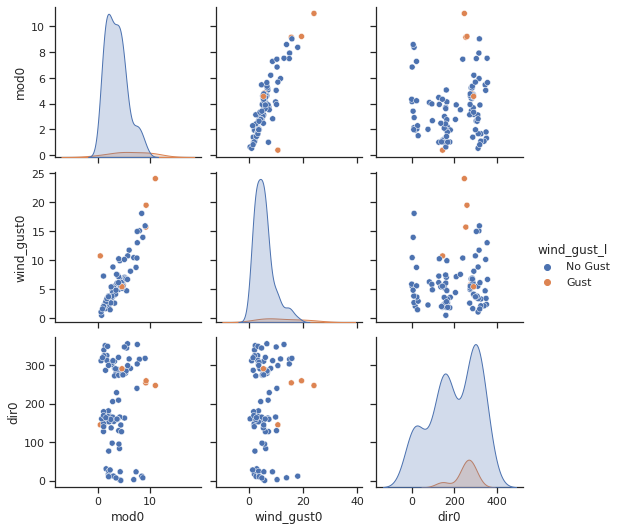

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["wind_gust_l","mod0","wind_gust0","dir0"]].sample(100), hue="wind_gust_l");

**Scatter plot 3 PCA variables and wind_gust_l**

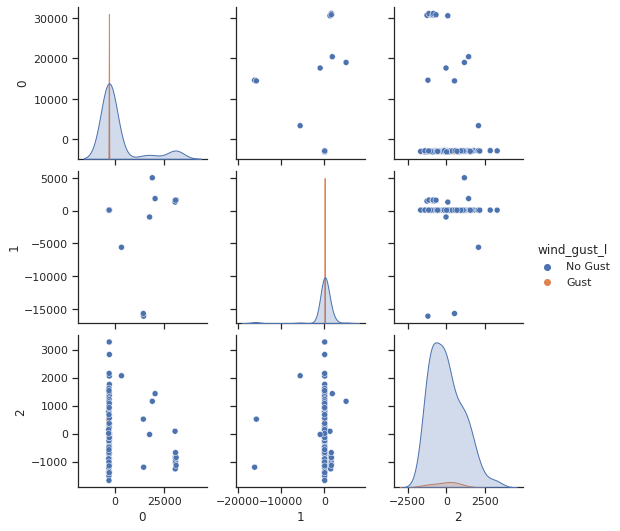

In [14]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["wind_gust_l"] = df_all1k.wind_gust_l
sns.pairplot(df_pca.sample(100), hue="wind_gust_l");

**Machine learning**

In [10]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:12<00:00,  2.50s/it]


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.84,0.77,None,0.88,0.23
Perceptron,0.94,0.77,None,0.95,0.24
QuadraticDiscriminantAnalysis,0.75,0.76,None,0.82,0.39
GaussianNB,0.76,0.75,None,0.83,0.22
LinearDiscriminantAnalysis,0.96,0.75,None,0.96,0.43
BernoulliNB,0.81,0.74,None,0.86,0.22
PassiveAggressiveClassifier,0.95,0.73,None,0.95,0.25
BaggingClassifier,0.96,0.68,None,0.96,6.11
LabelPropagation,0.95,0.68,None,0.95,11.50


**ML LGBMClassifier**

In [25]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           63       59   122
No Gust        98     3074  3172
All           161     3133  3294
Heidke Skill Score: 0.42

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.52      0.45   122.00
No Gust            0.98    0.97      0.98  3172.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.69    0.74      0.71  3294.00
weighted avg       0.96    0.95      0.96  3294.00

Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           70       60   130
No Gust       106     3058  3164
All           176     3118  3294
Heidke Skill Score: 0.43

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.40    0.54      0.46   130.00
No Gust            0.98    0.97      0.97  3164.00
accuracy   

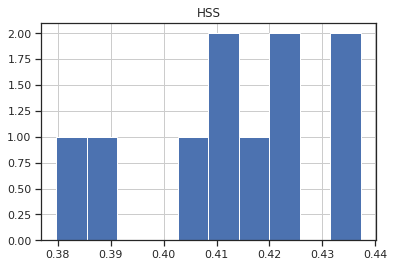

In [26]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = NearestCentroid().fit(X_train,y_train)

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nstatistics HSS")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [27]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#statistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0        Gust  No Gust
wind_gust_l               
Gust           66       74
No Gust        97     3057

p-value: 2.3947694129311892e-120
Significance level: 0.01
Degres of of freedom:  1
Statistic 544.1194380133609
Reject H0,There is an association between machine learning forecast and observed values


**Add time features**

In [28]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [19]:

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:11<00:00,  2.47s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.85,0.81,None,0.89,0.12
NearestCentroid,0.84,0.81,None,0.88,0.15
QuadraticDiscriminantAnalysis,0.76,0.78,None,0.83,0.28
BernoulliNB,0.81,0.76,None,0.86,0.20
LinearDiscriminantAnalysis,0.95,0.76,None,0.96,0.40
BaggingClassifier,0.96,0.70,None,0.95,5.98
RandomForestClassifier,0.96,0.69,None,0.96,7.39
LabelSpreading,0.94,0.68,None,0.94,15.73
LabelPropagation,0.94,0.68,None,0.94,10.78


In [29]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')


Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           63       59   122
No Gust       100     3072  3172
All           163     3131  3294
Heidke Skill Score: 0.42

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.52      0.44   122.00
No Gust            0.98    0.97      0.97  3172.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.68    0.74      0.71  3294.00
weighted avg       0.96    0.95      0.96  3294.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           63       67   130
No Gust        95     3069  3164
All           158     3136  3294
Heidke Skill Score: 0.41

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.40    0.48      0.44   130.00
No Gust            0.98    0.97      0.97  3164.00
accur

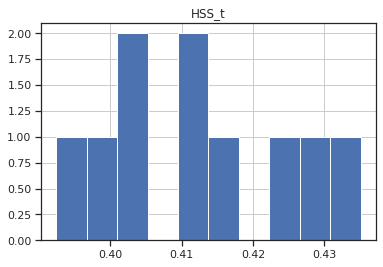

In [30]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_t = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  # machine learning
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nStatistics HSS_t")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS_t"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [31]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.421 0.432 0.42  0.409 0.417 0.38  0.437 0.389 0.406 0.409]

HSS with time variables: [0.417 0.412 0.429 0.404 0.422 0.392 0.404 0.397 0.41  0.435]

alpha:  0.01

p_value point:  0.46842442523229766

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


**Save machine learning model**

In [33]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("gust_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [34]:
import sklearn
print(sklearn.__version__)

0.24.1


**ExtraTreesClassifier too big to be upload at github!!**


Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           68       54   122
No Gust        97     3075  3172
All           165     3129  3294
Heidke Skill Score: 0.45

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.41    0.56      0.47   122.00
No Gust            0.98    0.97      0.98  3172.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.70    0.76      0.72  3294.00
weighted avg       0.96    0.95      0.96  3294.00

Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           67       67   134
No Gust       115     3045  3160
All           182     3112  3294
Heidke Skill Score: 0.4

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.37    0.50      0.42   134.00
No Gust            0.98    0.96      0.97  3160.00
accuracy    

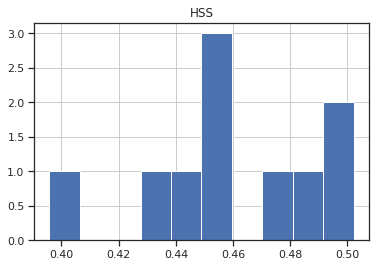

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();
     

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [39]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_t,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_plus,2))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.42 0.41 0.43 0.4  0.42 0.39 0.4  0.4  0.41 0.44]

HSS ExtraTreesClassifier: [0.45 0.4  0.45 0.44 0.5  0.43 0.48 0.45 0.5  0.48]

alpha:  0.01

p_value point:  0.0005907900931307238

we are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier

we are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier
